# Guided Project: Predicting Housing Prices

In this course, we started by building intuition for model based learning, explored how the linear regression model worked, understood how the two different approaches to model fitting worked, and some techniques for cleaning, transforming, and selecting features. In this guided project, you can practice what you learned in this course by exploring ways to improve the models we built. Let's start by setting up a pipeline of functions that will let us quickly iterate on different models.

* Import pandas, matplotlib, and numpy into the environment.
* Read AmesHousing.txt into a pandas data frame. Select the first 1460 rows from from data and assign to train. Select the remaining rows from data and assign to test.
* For the following functions, we recommend creating them in the first few cells in the notebook. This way, you can add cells to the end of the notebook to do experiments and update the functions in these cells.
  * Create a function named `transform_features()` that, for now, just returns the train data frame.
  * Create a function named `select_features()` that, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.
  * Create a function named `train_and_test()` that, for now:
    * trains a model using all columns except the SalePrice column from the data frame returned from select_features()
    * tests the model on the test set using k-fold cross-validation and returns the fold-level RMSE values as well as the average RMSE value.
    
Dataset description:
https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('AmesHousing.txt', sep='\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
train = data.iloc[:1460]
test = data.iloc[1460:]
target = 'SalePrice'

In [4]:
def transform_features(train):
    return train

def select_features(train):
    return train[['Gr Liv Area', target]]

def train_and_test(train):
    X = train.drop(target, axis=1)
    y = train[target]
    lr = LinearRegression()
    kf = KFold(10,  shuffle=True, random_state=42)
    mses = cross_val_score(lr, X, y, 
                           scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    return rmses, avg_rmse

def pipeline(train):
    train_trans = transform_features(train)
    train_selected = select_features(train_trans)
    return train_and_test(train_selected)

In [5]:
pipeline(train)

/Users/jeffrey.sternberg/Code/dataquest/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(array([ 56748.82946149,  56349.48341116,  51150.83173562,  62323.19801875,
         50137.04444069,  59439.93392326,  59680.07993746,  57567.73326237,
         57232.03654767,  49837.79805003]), 56046.696878851639)

# Feature transformation

Let's now start to removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. Update `transform_features()` so that any column from the data frame with more than 25% (or another cutoff value) missing values is dropped. 

You also need to remove any columns that leak information about the sale (e.g. like the year the sale happened). In general, the goal of this function is to:

* remove features that we don't want to use in the model, just based on the number of missing values or data leakage
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc)
* create new features by combining other features

Next, you need to get more familiar with the remaining columns by reading the data documentation for each column, determining what transformations are necessary (if any), and more. As we mentioned earlier, succeeding in predictive modeling (and competitions like Kaggle) is highly dependent on the quality of features the model has. Libraries like scikit-learn has made it quick and easy to simply try and tweak many different models, but cleaning, selecting, and transforming features is still more of an art that requires a bit of human ingenuity.

* As we mentioned earlier, add cells to the end of the notebook to explore and experiment with different features.
* The transform_features() function shouldn't modify the train data frame and instead return a new one entirely. This way, we can keep using train in the experimentation cells.
* Which columns need to be dropped immediately?
  * The PID column doesn't seem helpful for making predictions. Read the documentation to understand why (or display the column).
  * Which columns contain a large number of missing values?
  * Which columns leak data about the final sale?
  * Which columns contain less than 25% missing values and how should they be filled in?
  * Which columns in the data frame should be categorical? Here are some things you should think about:
* If a categorical column has hundreds of unique values (or categories), should you keep it? When you dummy code this column, hundreds of columns will need to be added back to the data frame.
* Which categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category? This would be similar to a low variance numerical feature (no variability in the data for the model to capture).
* Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?
* What new features can we create, that better capture the information in some of the features?
  * An example of this would be the `years_until_remod` feature we created in the last mission.
* Use this function to transform the test data frame as well.
                                                                                     

In [6]:
def transform_features(df, missing_threshold=.25):
    # don't modify the passed-in data frame and instead return a new one entirely. 
    # This way, we can keep using train & test in the experimentation cells
    df = df.copy()
    
    # The Order and PID columns don't seem helpful for making predictions
    df = df.drop(['Order', 'PID'], axis=1)
    
    # make meaningful age columns
    df['years_until_sale'] = df['Yr Sold'] - df['Year Built']
    df['years_until_remod'] = df['Year Remod/Add'] - df['Year Built']
    
    # remove the components of meaningful age colums
    # also, Yr Sold leaks information about the sale so need to remove it anyway
    to_drop = ['Yr Sold', 'Year Built', 'Year Remod/Add', 'Mo Sold', 'Garage Yr Blt']
    df = df.drop(to_drop, axis=1)
    
    # process datatypes separately
    df_numeric = clean_numerics(df, missing_threshold)
    df_cat = clean_categoricals(df, missing_threshold)
    
    # merge numeric and categorical for final transformed
    transformed = pd.concat([df_numeric, df_cat], axis=1)
    return transformed


def clean_numerics(df, missing_threshold):
    """Clean up numeric columns"""
    n = len(df)
    df_numeric = df.select_dtypes(include=['int64'])
    
    # remove numeric columns with > 25% missing values
    missing_num = df_numeric.isnull().sum()
    to_drop = missing_num[missing_num / n > missing_threshold].index
    # print("Dropping numerics: ", to_drop)
    df_numeric = df_numeric.drop(to_drop, axis=1)

    return df_numeric


def clean_categoricals(df, missing_threshold, make_dummies=True):
    """Clean up categorical columns"""
    n = len(df)
    df_cat = df.select_dtypes(include=['object']).copy()
    for col in df_cat.columns:
        df_cat[col] = df_cat[col].astype('category')
    
    # remove categorical columns with > 25% missing values
    missing_cat = df_cat.isnull().sum()
    to_drop = missing_cat[missing_cat / n > missing_threshold].index
    # print("Dropping categoricals: ", to_drop)
    df_cat = df_cat.drop(to_drop, axis=1)
    
    # also drop these 2 cat columns since they have many values 
    # and probably won't impact prediction...
    to_drop = ['Exterior 1st', 'Exterior 2nd']
    df_cat = df_cat.drop(to_drop, axis=1)
    
    # convert to dummy columns
    if make_dummies:
        df_cat = pd.get_dummies(df_cat)
    
    return df_cat

In [7]:
# test the transform_features function
train_trans = transform_features(train)
train_trans.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,...,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,31770,6,5,1656,0,0,1656,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20,11622,5,6,896,0,0,896,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,20,14267,6,6,1329,0,0,1329,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,20,11160,7,5,2110,0,0,2110,2,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,60,13830,5,5,928,701,0,1629,2,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
test_trans = transform_features(test)
test_trans.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
1460,60,9720,9,5,1366,581,0,1947,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1461,20,14860,8,5,1786,0,0,1786,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1462,60,11250,8,5,1149,1141,0,2290,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1463,60,8158,7,5,884,884,0,1768,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1464,60,10905,7,5,1129,1198,0,2327,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
train_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 224 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(200), int64(24)
memory usage: 2.5 MB


In [10]:
test_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Columns: 232 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(208), int64(24)
memory usage: 2.6 MB


In [11]:
# extra columns in test_trans!
# these are from the 'Bsmt Qual' column
set(test_trans.columns) - set(train_trans.columns)

{'Bsmt Qual_Po',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Electrical_Mix',
 'Functional_Sal',
 'Heating QC_Po',
 'MS Zoning_A (agr)',
 'Mas Vnr Type_CBlock',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Roof Matl_ClyTile',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Sale Condition_AdjLand',
 'Sale Type_VWD'}

In [12]:
train_trans_cat = clean_categoricals(train, 0.25, make_dummies=False)

In [13]:
# categorical columns with many values
for col in train_trans_cat.columns:
    distinct_vals = len(train_trans_cat[col].value_counts()) 
    if distinct_vals > 10:
        print(col, distinct_vals)

Neighborhood 26


Let's drop Exterior 1st and 2nd since those are just about the kind of siding the house has.
Intuition is that this would have a negligible impact on sales price...

In [14]:
# we do not expect a change here yet, but verify the pipeline still works
pipeline(train)

(array([ 56748.82946149,  56349.48341116,  51150.83173562,  62323.19801875,
         50137.04444069,  59439.93392326,  59680.07993746,  57567.73326237,
         57232.03654767,  49837.79805003]), 56046.696878851639)

# Feature Selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection.

Update the logic for the select_features() function. This function should take in the new, modified train and test data frames that were returned from transform_features().

Generate a correlation heatmap matrix of the numerical features in the traiing data set.

Which features correlate strongly with our target column, SalePrice?

Calculate the correlation coefficients for the columns that seem to correlate well with SalePrice. Because we have a pipeline in place, it's easy to try different features and see which features result in a better cross validation score.

What are some ways we can explore which categorical columns "correlate" well with SalePrice?

Read this post for some potential strategies.

In [15]:
train_for_corrs = transform_features(train)
corrs = train_for_corrs.corr()
sorted_corrs = corrs['SalePrice'].abs().sort_values()
sorted_corrs.head()

Condition 1_RRNn        0.000908
House Style_2.5Unf      0.002357
Neighborhood_Blmngtn    0.003189
House Style_1Story      0.003362
Roof Matl_Tar&Grv       0.003858
Name: SalePrice, dtype: float64

In [16]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
strong_corrs.sort_values(ascending=False).head(20)

SalePrice               1.000000
Overall Qual            0.804562
Gr Liv Area             0.698990
1st Flr SF              0.657119
Bsmt Qual_Ex            0.608481
Kitchen Qual_Ex         0.592950
years_until_sale        0.592273
Exter Qual_TA           0.582859
Foundation_PConc        0.551450
Exter Qual_Ex           0.530630
Kitchen Qual_TA         0.527303
Full Bath               0.518194
BsmtFin Type 1_GLQ      0.490034
Neighborhood_NridgHt    0.488428
Fireplaces              0.485683
TotRms AbvGrd           0.483701
Heating QC_Ex           0.482238
Bsmt Qual_TA            0.477152
Garage Finish_Unf       0.459766
Garage Finish_Fin       0.459358
Name: SalePrice, dtype: float64

In [17]:
corr_matrix = train_for_corrs[strong_corrs.index].corr()
corr_matrix.head()

,Sale Condition_Partial,Sale Type_New,Wood Deck SF,MS Zoning_RM,Open Porch SF,Bsmt Exposure_Gd,Heating QC_TA,Garage Type_Attchd,Foundation_CBlock,Garage Type_Detchd,...,Exter Qual_Ex,Foundation_PConc,Exter Qual_TA,years_until_sale,Kitchen Qual_Ex,Bsmt Qual_Ex,1st Flr SF,Gr Liv Area,Overall Qual,SalePrice
Sale Condition_Partial,1.000000,0.966351,-0.022384,-0.064643,0.151342,0.030140,-0.139703,0.110746,-0.163027,-0.108746,...,0.300288,0.212543,-0.229330,-0.239167,0.293429,0.306855,0.188164,0.102534,0.254181,0.305995
Sale Type_New,0.966351,1.000000,-0.012519,-0.070169,0.162303,0.010711,-0.135002,0.109596,-0.170264,-0.111381,...,0.312836,0.217626,-0.233595,-0.241214,0.293720,0.320909,0.187230,0.110356,0.260880,0.312074
Wood Deck SF,-0.022384,-0.012519,1.000000,-0.151915,0.039738,0.199579,-0.082843,0.182846,-0.104142,-0.202966,...,0.125621,0.189910,-0.186896,-0.248055,0.135117,0.155847,0.206013,0.238396,0.260258,0.319104
MS Zoning_RM,-0.064643,-0.070169,-0.151915,1.000000,-0.059369,-0.087626,0.113938,-0.351799,-0.038463,0.363513,...,-0.074764,-0.230310,0.204098,0.489966,-0.090089,-0.106896,-0.311146,-0.135967,-0.232980,-0.320506
Open Porch SF,0.151342,0.162303,0.039738,-0.059369,1.000000,0.086379,-0.197230,0.123543,-0.220071,-0.152950,...,0.166715,0.270003,-0.283844,-0.192802,0.180223,0.199982,0.191891,0.321806,0.319954,0.344383


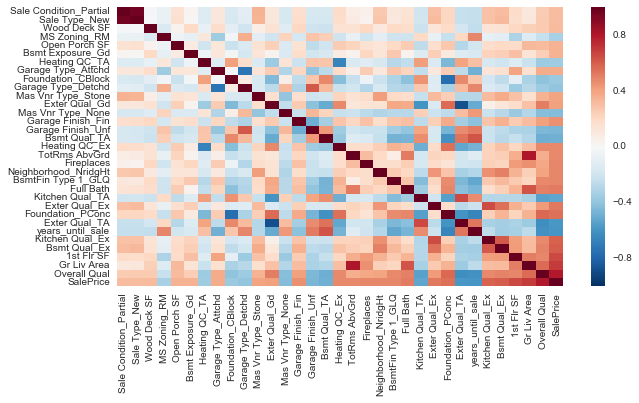

In [18]:
# visualize correlated pairs with a heatmap
# see: http://seaborn.pydata.org/examples/heatmap_annotation.html
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix)
plt.show()

In [19]:
# most correlated pairs, in tabular form
# from: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs[(corr_pairs < 1.0) & (corr_pairs > .8)]

Sale Type_New           Sale Condition_Partial    0.966351
Sale Condition_Partial  Sale Type_New             0.966351
Exter Qual_Gd           Exter Qual_TA             0.880314
Exter Qual_TA           Exter Qual_Gd             0.880314
TotRms AbvGrd           Gr Liv Area               0.807301
Gr Liv Area             TotRms AbvGrd             0.807301
Overall Qual            SalePrice                 0.804562
SalePrice               Overall Qual              0.804562
dtype: float64

In [20]:
# highly correlated feature pairs: pick one of each

# Sale Type_New           Sale Condition_Partial
# Exter Qual_Gd           Exter Qual_TA
# TotRms AbvGrd           Gr Liv Area
# Overall Qual            SalePrice -- ignore this one since one of the columns is the target

# columns to remove:
'TotRms AbvGrd', 'Exter Qual_Gd', 'Sale Type_New'

('TotRms AbvGrd', 'Exter Qual_Gd', 'Sale Type_New')

In [21]:
def select_features(train):
    return train.drop(['TotRms AbvGrd', 'Exter Qual_Gd', 'Sale Type_New'], axis=1)

In [22]:
# the pipeline
pipeline(train)

(array([ 31738.0720975 ,  27393.91085887,  20050.23108311,  27651.81922843,
         20311.63246109,  28506.18809389,  25421.57610255,  21841.74182084,
         20990.35864211,  20057.2394676 ]), 24396.276985598801)

In [23]:
(56046.696878851639 - 24396.276985598801) / 56046.696878851639

0.5647151688826043

With transformed features the avs rmse was reduced from 56046.696878851639 to 24396.276985598801 
This represents a 56% improvement in accuracy!

# Training and Testing

Now for the final part of the pipeline, training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named `cv_type` that controls the type of cross validation that occurs.

The `cv_type` feature should accept only the following values: "simple" and "kfold"

Implement simple cross validation:

* Train a model on the training data set that was returned from transform_features() and test on the test data set returned from the same function. Compute the RMSE value.

* Train a model on the test data set and test on the original train data set. Compute the 2nd RMSE value. Return both the RMSE values and the average RMSE value.

Implement k-fold cross validation using 10 folds:

* Combine both data frames into one and add a fold column to the combined data frame.

* Subset the data frame by the fold number, train on the remaining folds, test on the current fold. Compute the RMSE value for each iteration and return the average RMSE value.

In [24]:
def train_and_test(train, test, cv_type):
    
    if cv_type not in ("simple", "kfold"):
        raise AttributeError("cy_type should be either 'simple' or 'kfold'")

    # ensure datasets are aligned
    # the process of making dummies can result in train and test having different columns
    train, test = align_columns(train, test)
        
    lr = LinearRegression()
    rmses = []
        
    if cv_type == "simple":
        
        # first pass, use train for training and test for testing. 2nd pass, swap df's
        for train, test in [(train, test), (test, train)]:
        
            X_train = train.drop(target, axis=1)
            y_train = train[target]
            X_test = test.drop(target, axis=1)
            y_test = test[target]

            lr.fit(X_train, y_train)
            predictions = lr.predict(X_test)

            mse = mean_squared_error(predictions, y_test)
            rmse = np.sqrt(np.abs(mse))
            rmses.append(rmse)
        
    else:
        # combine train and test back into one df for k-folds
        combo = pd.concat([train, test], axis=0)
        X = combo.drop(target, axis=1)
        y = combo[target]
        
        kf = KFold(10,  shuffle=True, random_state=42)
        mses = cross_val_score(lr, X, y, 
                               scoring='neg_mean_squared_error', cv=kf)
        rmses = np.sqrt(np.abs(mses))

    avg_rmse = np.mean(rmses)
    return {"rmses": rmses, "avg_rmse": avg_rmse}


def align_columns(ds1, ds2):
    """ Remove any columns from ds1 or ds2 that do not exist in both."""
    common_columns = list(set(ds1.columns) & set(ds2.columns))
    return ds1[common_columns], ds2[common_columns]


def pipeline(data, target, cv_type):
    """
    Implements a full machine learning pipeline on a dataset:
    1. split the data into equal training and test sets
    2. transform features for train and test
    3. select features from train and test
    4. run machine learning training and test evaluation
    """
    n = len(data)
    half = int(n/2)
    train = data.iloc[:half]
    test = data.iloc[half:]
    
    train_trans = transform_features(train)
    test_trans = transform_features(test)
    train_selected = select_features(train_trans)
    test_selected = select_features(test_trans)
    return train_and_test(train_selected, test_selected, cv_type)

In [25]:
pipeline(data, "SalePrice", "simple")

{'avg_rmse': 46141.851380966698,
 'rmses': [61939.348550943323, 30344.35421099007]}

In [26]:
pipeline(data, "SalePrice", "kfold")

{'avg_rmse': 28640.123676099309,
 'rmses': array([ 32444.62857645,  25894.91806841,  24104.60740199,  39386.4172447 ,
         24468.05453181,  28053.34799574,  26143.80007775,  35149.64084174,
         25290.94752289,  25464.87449953])}